<a href="https://colab.research.google.com/github/willianszwy/Aprendizado-Supervisionado-no-Neuronio-Perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Parte I - Resolvendo um problema linearmente separável

Clonando o repositório do github que contém o data

In [3]:
# Descomentar essa linha se der erro
#!git clone https://github.com/jesusdourado/rna-atividade2.1-data.git

Cloning into 'rna-atividade2.1-data'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [27]:
exemplos = np.fromfile('rna-atividade2.1-data/data/dataAll.txt').reshape(-1,3)

In [246]:
#random.seed(dt.datetime.now().time())
np.random.seed()

## Implementando o neurônio Perceptron de Rosenblatt

In [265]:
class Perceptron:

    def __init__(self, tamanho, bias = 0, taxa_aprendizado = 0.1, min_peso = -0.5, max_peso = 0.5) -> None:
        self.bias = bias
        self.taxa_aprendizado = taxa_aprendizado
        self.pesos = np.zeros(tamanho + 1)
        self.pesos[0] = random.uniform(min_peso, max_peso)
        self.pesos[1] = random.uniform(min_peso, max_peso)
        self.pesos[2] = random.uniform(min_peso, max_peso)
        self.entradas = np.empty(tamanho + 1)
        self.entradas[0] = self.bias
        self.erro = 0
        self.atualiza_pesos_contador = 0 

    def treinar_limitado_epoca(self, d, qtd_epocas = 100):
      print("Vetor de pesos iniciais: ")
      print(self.pesos)
      tamanho_dados = len(d)
      epoca = 0
      continua = True
      while continua and epoca < qtd_epocas:
        if epoca > 0:
          d = np.random.permutation(d)
        epoca += 1
        contem_erro = False
        qtd_ajustes_pesos_epoca = 0

        for i in range(d.shape[0]):
          
          self.entradas[1] = d[i][0]
          self.entradas[2] = d[i][1]

          y = self.predicao()
          self.calcula_erro(y, d[i][2])

          if self.erro != 0:
            qtd_ajustes_pesos_epoca += 1
            self.atualiza_pesos()
            contem_erro = True

        if not contem_erro:
          continua = True

      self.mostrar_relatorio_treino(epoca)

    def treinar(self, d):
        print("Pesos iniciais: ", self.pesos)
        epoca = 0
        continua = True
        while continua:
            epoca += 1
            print("Época: ", epoca)
            contem_erro = False
            qtd_ajustes_pesos_epoca = 0

            for i in range(d.shape[0]):

                self.entradas[1] = d[i][0]
                self.entradas[2] = d[i][1]

                y = self.predicao()
                self.calcula_erro(y, d[i][2])

                if self.erro != 0:
                    self.atualiza_pesos()
                    print("pesos atualizados: ",self.pesos)
                    qtd_ajustes_pesos_epoca += 1
                    contem_erro = True      

            print("Total ajustes de pesos da época: ", qtd_ajustes_pesos_epoca)

            if not contem_erro:
                continua = False
        self.mostrar_relatorio_treino(epoca)

    def mostrar_relatorio_treino(self, num_epocas):
      print("\n","="*6, "RELATÓRIO DO TREINO", "="*6)
      print("Número total de ajustes dos pesos: ", self.atualiza_pesos_contador)
      print("Número de Épocas: ", num_epocas)
      print("Pesos finais: ", self.pesos)

    def teste(self, prever_classe):
      lista_predicao = []
      for registro in prever_classe:
        self.entradas[1] = registro[0]
        self.entradas[2] = registro[1]

        y = self.predicao()
        lista_predicao.append(y)
      return lista_predicao

    def funcao_de_ativacao(self, x):
        return 1 if x >= 0 else 0

    def predicao(self):
        y = self.pesos.T.dot(self.entradas)
        return self.funcao_de_ativacao(y)

    def calcula_erro(self,y, yd):
        self.erro = yd - y

    def delta(self):
        return self.taxa_aprendizado * self.erro * self.entradas

    def atualiza_pesos(self):
            self.pesos =  self.pesos + self.delta()
            self.atualiza_pesos_contador += 1

    def plot_data(self,X, scala_min = -1000, scala_max = 1000):
        plt.figure(figsize=(10,6))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.title("Neurônio Perceptron")
        plt.grid(True)

        for i in range(X.shape[0]):
            plt.plot(X[i][0],X[i][1],'b.' if (X[i][2] == 1) else 'r.')

        x1 = np.array([scala_min, scala_max])
        m = -self.pesos[1]/self.pesos[2]
        c = -self.pesos[0]/self.pesos[2]
        x2 = m*x1 + c
    
        plt.plot(x1, x2, 'k-',linewidth=2)

In [203]:
neuronio = Perceptron(2)
neuronio.treinar(exemplos)

Pesos iniciais:  [-0.09802453  0.26434778  0.34336213]
Época:  1
pesos atualizados:  [ -0.09802453  33.14006778 -25.33321787]
pesos atualizados:  [ -0.09802453   1.71709778 -59.71696787]
pesos atualizados:  [ -0.09802453  74.51311778 -23.88740787]
pesos atualizados:  [-9.80245322e-02 -9.01649222e+00 -1.23013238e+02]
pesos atualizados:  [-9.80245322e-02  4.01703678e+01 -1.06384508e+02]
pesos atualizados:  [-9.80245322e-02  1.22769068e+02 -2.65286779e+01]
pesos atualizados:  [-9.80245322e-02  8.27601578e+01 -1.04421368e+02]
pesos atualizados:  [-9.80245322e-02  1.36429968e+02 -5.53290979e+01]
pesos atualizados:  [-9.80245322e-02  8.34699078e+01 -1.12198558e+02]
pesos atualizados:  [-9.80245322e-02  1.43029428e+02 -6.20762279e+01]
pesos atualizados:  [-9.80245322e-02  1.10551438e+02 -1.35532048e+02]
pesos atualizados:  [-9.80245322e-02  1.81925948e+02 -7.09899279e+01]
pesos atualizados:  [-9.80245322e-02  1.36401318e+02 -1.36625858e+02]
pesos atualizados:  [-9.80245322e-02  2.19293188e+02

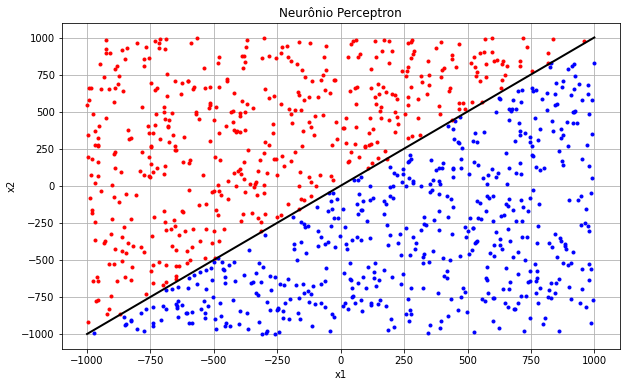

In [204]:
neuronio.plot_data(exemplos)

# Parte II - Experimentação

Calculando o identificador para ler o data**X**.txt

In [ ]:
def caminhoDados ():
  matriculas = [1715080108, 1815310070, 1515080172, 1815310027]
  soma = 0

  for m in matriculas:
    soma += m % 10

  soma = soma % 4

  return 'rna-atividade2.1-data/data/data' + str(x) + '.txt'

print(caminhoDados())

rna-atividade2.1-data/data/data1.txt


In [ ]:
exemplos = np.fromfile(caminhoDados()).reshape(-1, 3)
neuronio = Perceptron(2, -1, 0.1, -100, 100)
neuronio.treinar(exemplos)


Época:  1
pesos atualizados:  [ 30.13582833  24.84563034 -14.67315445]
pesos atualizados:  [ 30.23582833  24.73411675 -14.65324525]
pesos atualizados:  [ 30.33582833  24.62001215 -14.63567287]
pesos atualizados:  [ 30.23582833  24.71951664 -14.53677431]
pesos atualizados:  [ 30.13582833  24.81631941 -14.42447384]
pesos atualizados:  [ 30.03582833  24.93430105 -14.34381346]
pesos atualizados:  [ 29.93582833  25.0357061  -14.22513869]
pesos atualizados:  [ 29.83582833  25.15672993 -14.10909027]
pesos atualizados:  [ 29.73582833  25.24413    -13.9949335 ]
pesos atualizados:  [ 29.63582833  25.35685133 -13.89583051]
pesos atualizados:  [ 29.53582833  25.47492883 -13.79741796]
pesos atualizados:  [ 29.43582833  25.56680642 -13.71154024]
pesos atualizados:  [ 29.33582833  25.65701259 -13.6007575 ]
pesos atualizados:  [ 29.23582833  25.75538625 -13.50079489]
pesos atualizados:  [ 29.13582833  25.85585809 -13.41083308]
pesos atualizados:  [ 29.03582833  25.964913   -13.32097   ]
pesos atualiza

# Parte III - Validação *Holdout* em problema não linearmente separável

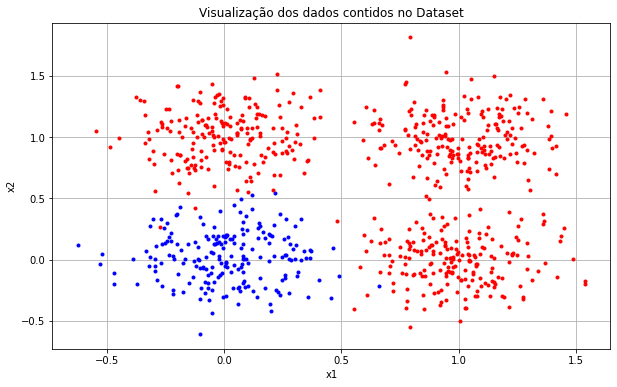

In [292]:
exemplos_holdout = np.fromfile("rna-atividade2.1-data/data/dataHoldout.txt").reshape(-1, 3)


plt.figure(figsize=(10,6))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Visualização dos dados contidos no Dataset")
plt.grid(True)

for i in range(exemplos_holdout.shape[0]):
    plt.plot(exemplos_holdout[i][0], exemplos_holdout[i][1], 'b.' if (exemplos_holdout[i][2] == 1) else 'r.')

plt.show()

Conforme os dados estão distrubídos no gráfico acima, podemos inferir que o problema não é linearmente sepável visto que não conseguimos gerar um hiperplano, ou seja, não conseguimos serparar através de uma reta. Sabendo disso, utilizaremos o perceptron para treinar até 100 épocas, para ver como o algoritmo irá se sair. 

In [312]:
exemplos_holdout = np.fromfile("rna-atividade2.1-data/data/dataHoldout.txt").reshape(-1, 3)

tamanho_dataset = exemplos_holdout.shape[0]
tamanho_treino = int(tamanho_dataset * 0.7)

exemplos_aleatorios = np.random.permutation(exemplos_holdout)

exemplos_treino = exemplos_aleatorios[:tamanho_treino]
exemplos_teste = exemplos_aleatorios[tamanho_treino:]

neuronio = Perceptron(tamanho = 2, bias = -1, taxa_aprendizado = 0.1, min_peso = -0.5, max_peso = 0.5)
neuronio.treinar_limitado_epoca(exemplos_treino)

Vetor de pesos iniciais: 
[ 0.4234557  -0.1926626  -0.26006518]

 ====== RELATÓRIO DO TREINO ======
Número total de ajustes dos pesos:  2623
Número de Épocas:  100
Pesos finais:  [-0.2765443  -0.60641829 -0.49006987]


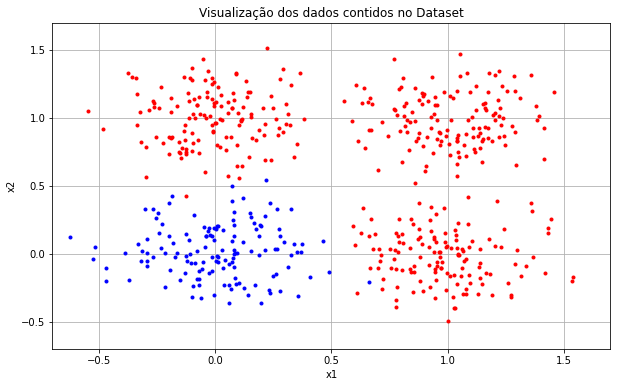

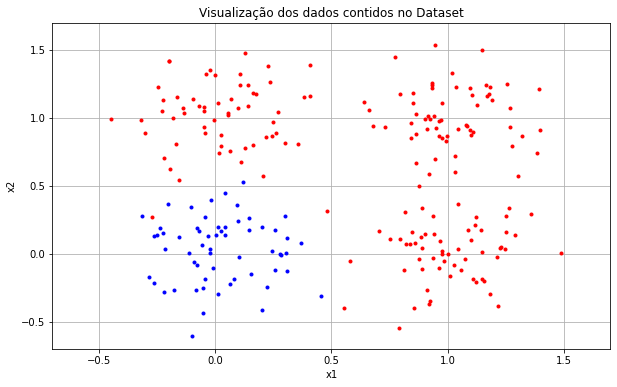

In [313]:
plt.figure(figsize=(10,6))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Visualização dos dados contidos no Dataset")
plt.grid(True)
plt.axis([-0.7, 1.7, -0.7, 1.7])
for i in range(exemplos_treino.shape[0]):
    plt.plot(exemplos_treino[i][0], exemplos_treino[i][1], 'b.' if (exemplos_treino[i][2] == 1) else 'r.')

plt.show()

plt.figure(figsize=(10,6))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Visualização dos dados contidos no Dataset")
plt.axis([-0.7, 1.7, -0.7, 1.7])
plt.grid(True)

for i in range(exemplos_teste.shape[0]):
    plt.plot(exemplos_teste[i][0], exemplos_teste[i][1], 'b.' if (exemplos_teste[i][2] == 1) else 'r.')

plt.show()

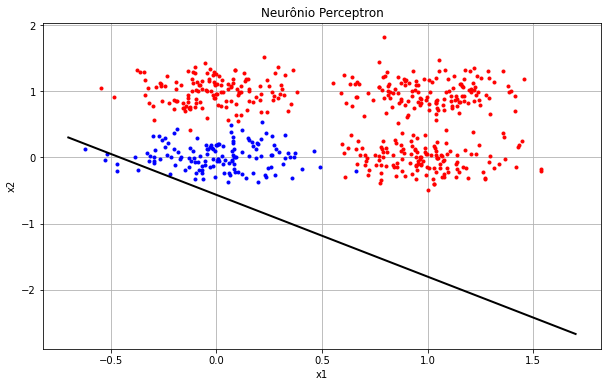

In [319]:
neuronio.plot_data(exemplos_treino, scala_min= -0.7, scala_max=1.7)

In [315]:
exemplos_teste_x = exemplos_teste[:,:2]
exemplos_teste_y = exemplos_teste[:,2]

predicao_teste = neuronio.teste(exemplos_teste_x)

cm = confusion_matrix(exemplos_teste_y, predicao_teste)
cm

array([[172,   8],
       [  2,  58]])

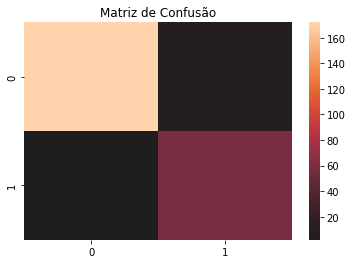

In [316]:
sns.heatmap(cm, center=True)
plt.title("Matriz de Confusão")
plt.show()

In [317]:
exemplos_treino_x = exemplos_treino[:,:2]
exemplos_treino_y = exemplos_treino[:,2]

predicao_treino = neuronio.teste(exemplos_treino_x)

print("Acurácia para os dados do conjunto de treinamento inicialmente fornecido: ", metrics.accuracy_score(exemplos_treino_y, predicao_treino))

Acurácia para os dados do conjunto de treinamento inicialmente fornecido:  0.9607142857142857


In [318]:
nome_classes = ["Classe 0", "Classe 1"]
print(metrics.classification_report(exemplos_treino_y, predicao_treino, target_names=nome_classes))

              precision    recall  f1-score   support

    Classe 0       0.98      0.96      0.97       420
    Classe 1       0.90      0.95      0.92       140

    accuracy                           0.96       560
   macro avg       0.94      0.96      0.95       560
weighted avg       0.96      0.96      0.96       560

